#                        <p align="center"> **Traffic Signs Recognition** </p>


## 1.The first step is to import required librairies

In [2]:
"""pandas is a Python package that provides fast, flexible, and expressive data structures
designed to make working with "relational" or "labeled" data both easy and intuitive."""
import pandas as pd
"""NumPy is a Python library used for working with arrays.
It also has functions for working in domain of linear algebra, fourier transform, and matrices."""
import numpy as np

"""Matplotlib is a comprehensive library for creating static, animated, and interactive
visualizations in Python. Matplotlib makes easy things easy and hard things possible."""
import  matplotlib.pyplot as plt 
"""OpenCV is the huge open-source library for the computer vision, machine learning, and image 
processing and now it plays a major role in real-time operation which is very important
in today’s systems"""
import cv2
"""This module provides a portable way of using operating system dependent functionality. If you
just want to read or write a file see open(), if you want to manipulate paths, see the os.path 
module, and if you want to read all the lines in all the files on the command line see the 
fileinput module"""
import os
"""The Python Imaging Library adds image processing capabilities to your Python interpreter.
This library provides extensive file format support, an efficient internal representation, 
and fairly powerful image processing capabilities."""
from PIL import Image
"""scikit-learn is a Python module for machine learning built on top of SciPy and is distributed
under the 3-Clause BSD license."""
from sklearn.model_selection import train_test_split
"""Tensorflow is one of the most-used deep-learning frameworks. It’s arguably the most popular
machine learning platform on the web, with a broad range of users from those just starting out, 
to people looking for an edge in their careers and businesses. """
import tensorflow as tf 
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense ,Flatten,Dropout
print('the cell was executed without errors')

the cell was executed without errors


## 2. Load the dataset

In [3]:
data = []
labels = []
classes = 43
Path_data=r'C:\Users\kabir\Desktop\Projects\Traffic_Recognition\data\raw'

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(Path_data,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print('the cell was executed without errors')

the cell was executed without errors


In [4]:
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


# we will split our Dataset into Train Part and  Validation part

In [5]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,train_size=0.8,random_state=10)

# Label encoder (Dummy variables)

In [6]:
Y_train=to_categorical(Y_train,43)

In [7]:
Y_val=to_categorical(Y_val,43)

# In this section i will  build our model architecture

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [10]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_val, Y_val))

Epoch 1/15
981/981 [==============================] - 16s 5ms/step - loss: 2.3394 - accuracy: 0.3885 - val_loss: 0.8472 - val_accuracy: 0.7689
Epoch 2/15
981/981 [==============================] - 5s 5ms/step - loss: 0.8721 - accuracy: 0.7421 - val_loss: 0.2889 - val_accuracy: 0.9362
Epoch 3/15
981/981 [==============================] - 5s 5ms/step - loss: 0.4911 - accuracy: 0.8575 - val_loss: 0.3611 - val_accuracy: 0.8868
Epoch 4/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3957 - accuracy: 0.8858 - val_loss: 0.1123 - val_accuracy: 0.9713
Epoch 5/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3331 - accuracy: 0.9059 - val_loss: 0.1928 - val_accuracy: 0.9485
Epoch 6/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2940 - accuracy: 0.9189 - val_loss: 0.0707 - val_accuracy: 0.9804
Epoch 7/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2503 - accuracy: 0.9298 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch

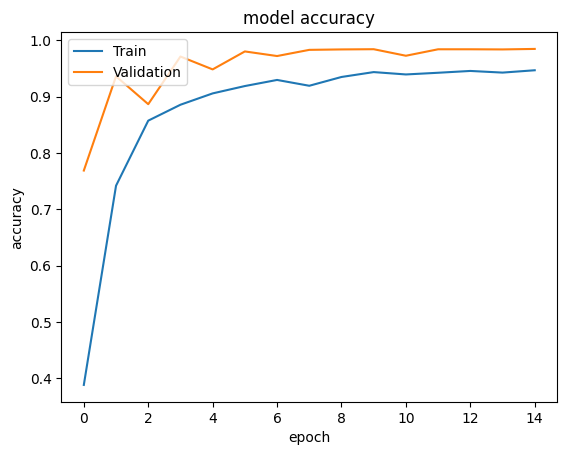

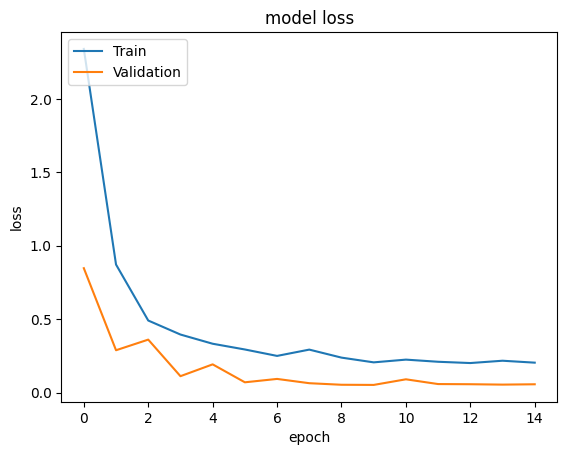

In [11]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\src\visualization\Accuracy_1.png")

plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\src\visualization\Loss_1.png")

plt.show()

In [12]:
Path_model=r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\models"
model.save(os.path.join(Path_model,"Traffic_Sign_CNN_1.h5"))


In [13]:
import os
Directory=r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\data\raw\Train"
Classes_names=os.listdir(Directory)
print(len(Classes_names))
print(Classes_names)

43
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [14]:
from keras.models import load_model
#from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix

Path_model=r"C:\Users\kabir\Desktop\Projects\Traffic_Recognition\models"

#model = load_model(os.path.join(Path_model,"Traffic_Sign_CNN_1.h5"))
# Predict the test data using the trained model
y_pred = model.predict(X_val)

# Calculate the confusion matrix of predicted vs actual values
conf_matrix = confusion_matrix(Y_val.argmax(axis=1), y_pred.argmax(axis=1), binary=False)

print("Confusion Matrix:")
print(conf_matrix)


246/246 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 42   2   0 ...   0   0   0]
 [  0 428   4 ...   0   0   0]
 [  0   0 448 ...   0   0   0]
 ...
 [  0   4   0 ...  70   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   1  52]]


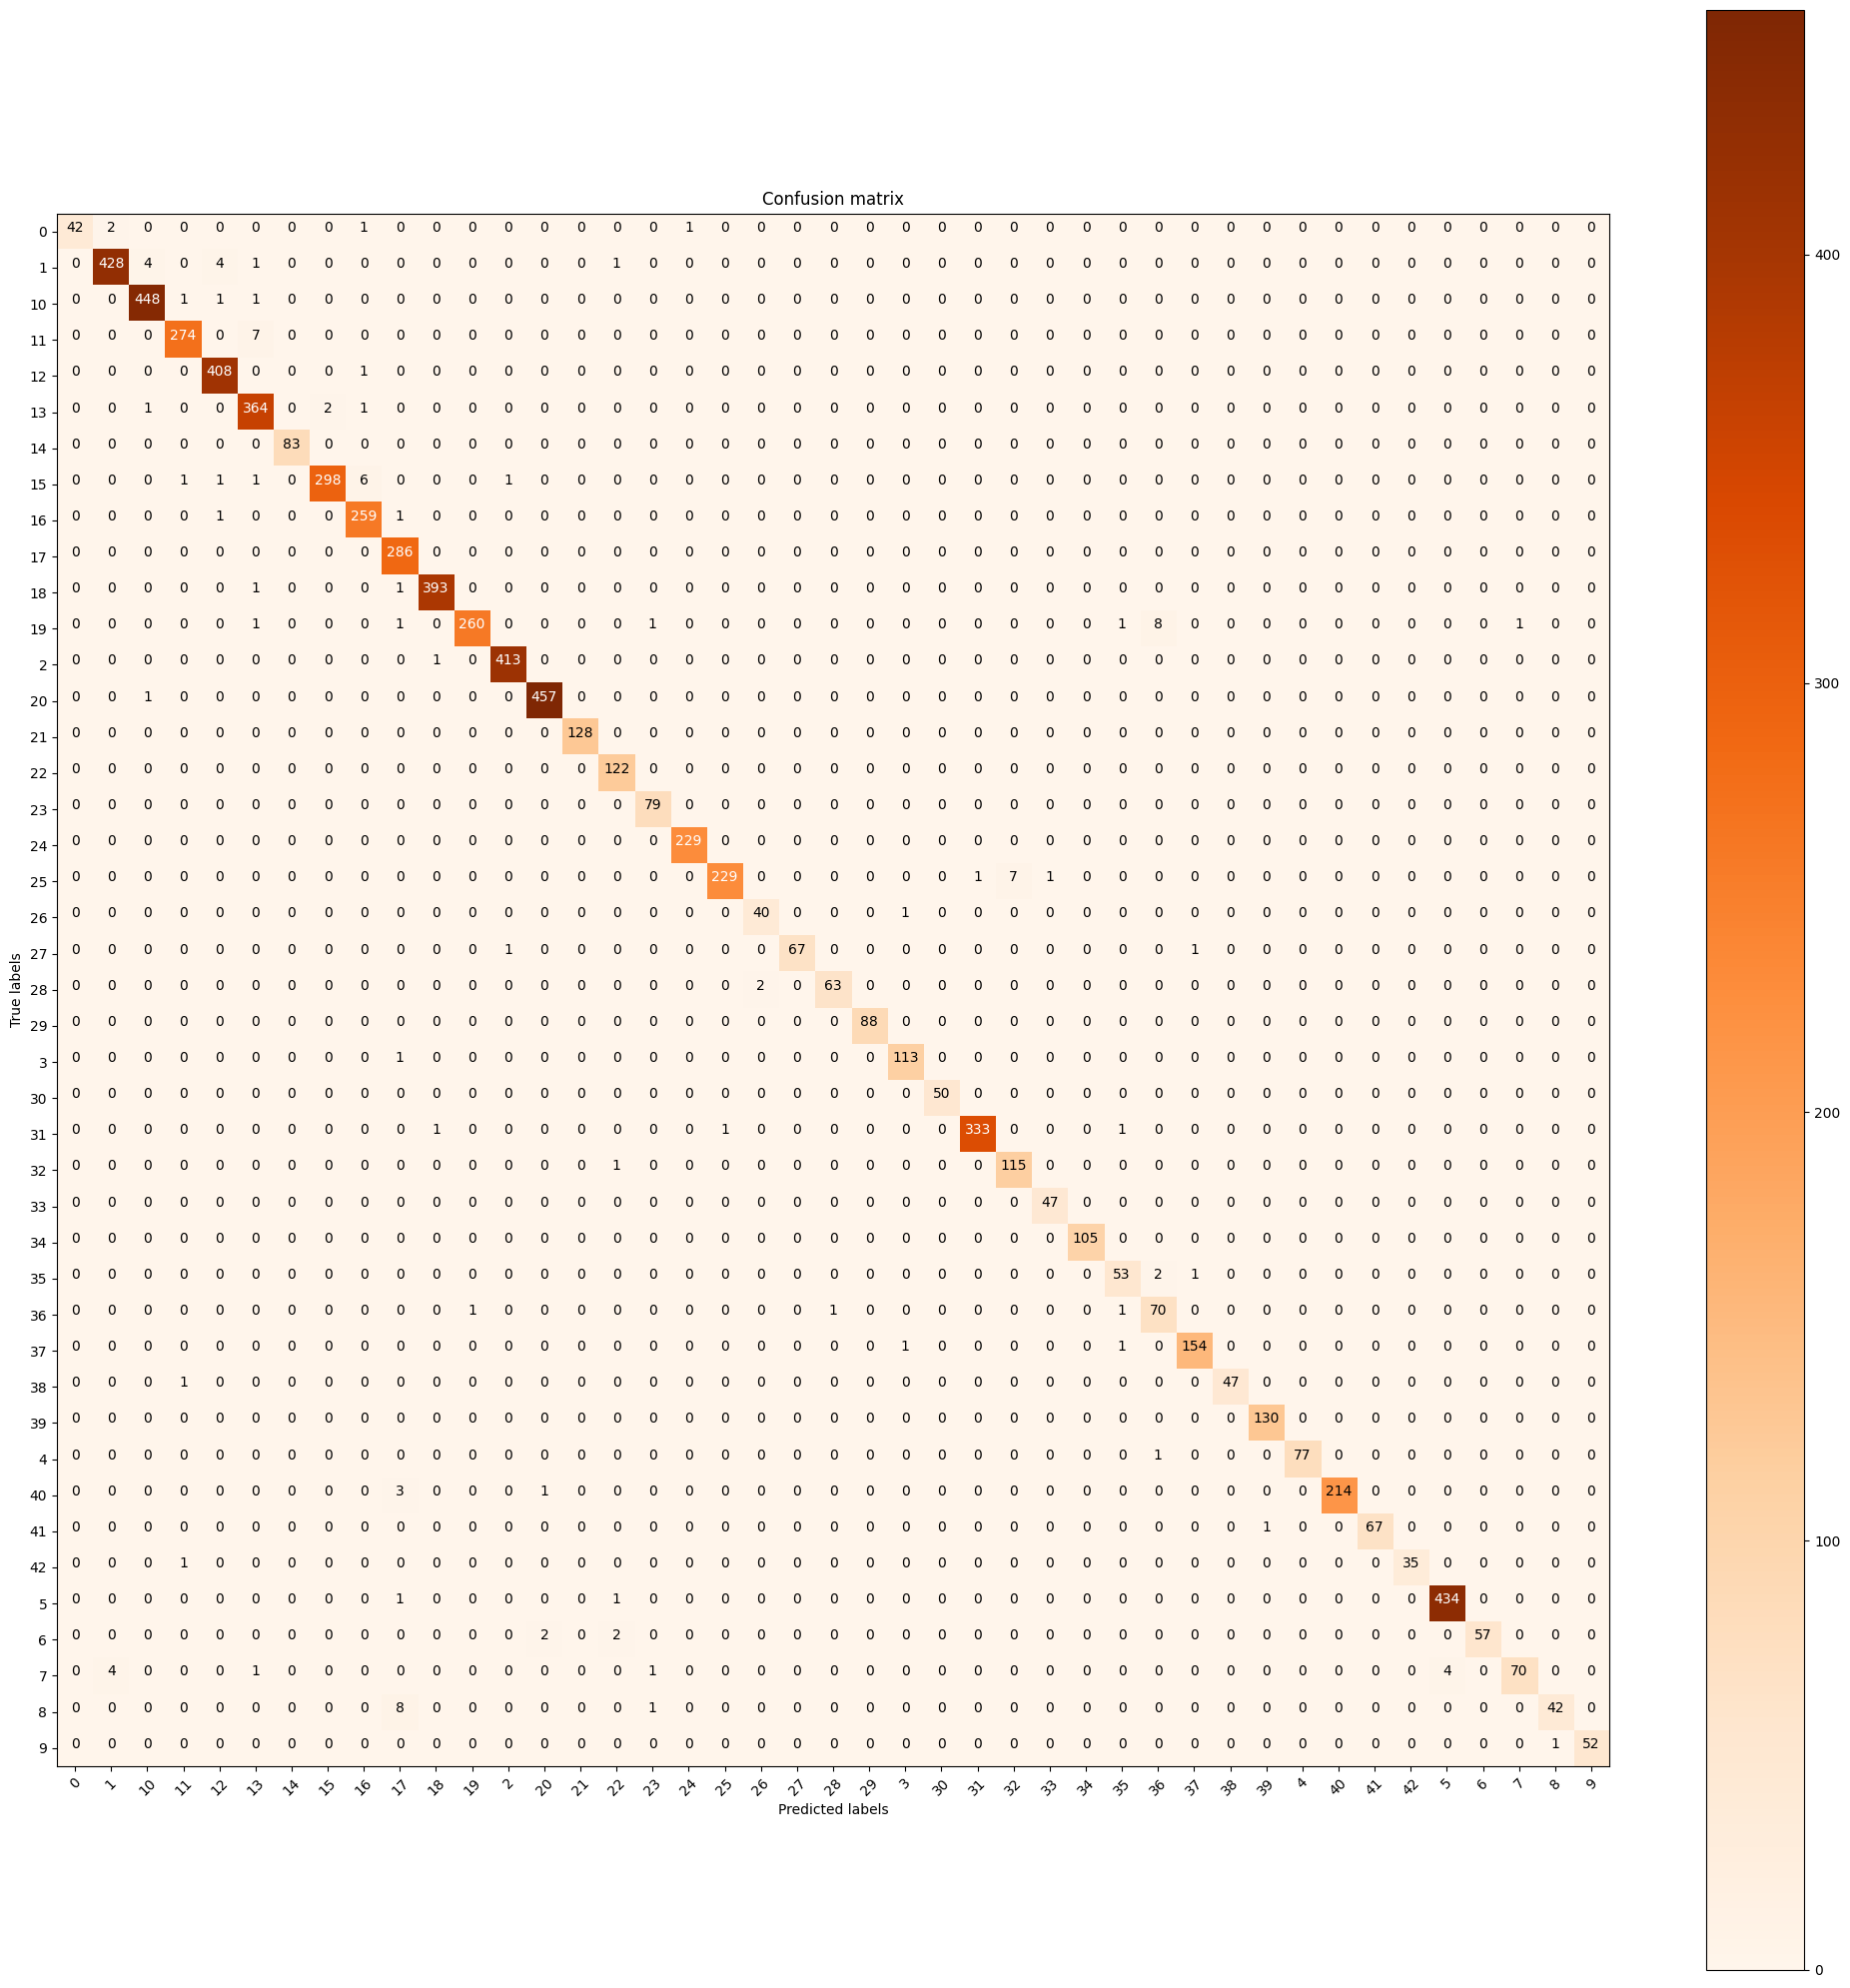

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    """
    arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    """
     
    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()
    
    
    
# a tuple for all the class names
target_names = ('0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', 
                '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
                '41', '42', '5', '6', '7', '8', '9')

from keras.models import load_model
plot_confusion_matrix(conf_matrix, target_names)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_val.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        46
           1       0.99      0.98      0.98       438
           2       0.99      0.99      0.99       451
           3       0.99      0.98      0.98       281
           4       0.98      1.00      0.99       409
           5       0.97      0.99      0.98       368
           6       1.00      1.00      1.00        83
           7       0.99      0.97      0.98       308
           8       0.97      0.99      0.98       261
           9       0.95      1.00      0.97       286
          10       0.99      0.99      0.99       395
          11       1.00      0.95      0.97       273
          12       1.00      1.00      1.00       414
          13       0.99      1.00      1.00       458
          14       1.00      1.00      1.00       128
          15       0.96      1.00      0.98       122
          16       0.96      1.00      0.98        79
          17       1.00    

In [ ]:
def assess_model_from_pb(model_file_path: Path, xtest: np.ndarray, ytest: np.ndarray, save_plot_path: Path):

    class_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    model = load_model(model_file_path) # load model from filepath
    feature_extractor = Model(inputs = model.inputs, outputs = model.get_layer('dense').output) # extract dense output layer (will be softmax probabilities)
    y_score = feature_extractor.predict(xtest, batch_size = 64) # one hot encoded softmax predictions
    ytest_binary = label_binarize(ytest, classes = [0,1,2,3,4,5,6,7,8,9]) # one hot encode the test data true labels
    n_classes = y_score.shape[2]

    fpr = dict()
    tpr = dict()
    roc_auc = dict() 
    # compute fpr and tpr with roc_curve from the ytest true labels to the scores
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytest_binary[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # plot each class  curve on single graph for multi-class one vs all classification
    colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan'])
    for i, color, lbl in zip(range(n_classes), colors, class_labels):
        plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
        label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw = 1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CIFAR-10 Multi-Class Data')
    plt.legend(loc = 'lower right', prop = {'size': 6})
    fullpath = save_plot_path.joinpath(save_plot_path.stem +'_roc_curve.png')
    plt.savefig(fullpath)
    plt.show()